# Exercício Programa 2

Você deve preencher todas as células desse nootebook com os códigos solicitados. 

Minha sugestão é preencher depois que seu programa estiver completo e funcionado. Assim, é só copiar os trechos de código do arquivo .py e colar nas células.

## Modulos necessários

In [17]:
# coloque todos os modulos que seu programa precisa aqui
import matplotlib.pyplot as plt #matplotlib
import math as m #math

## Função

$f(x) = xe^{−x}$

In [18]:
def func3(x): #Função associada a função 10: (xe^−x dx) de 0 a 15
    """Essa função aplica a terceira função em um x e retorna o resultado. 
    É uma das funções obrigatórias"""
    return x*m.exp(-x)

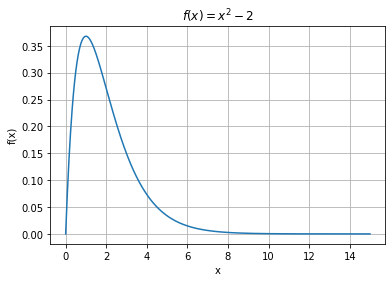

In [19]:
# Gráfico da função escolhida (essa parte não precisa estar no seu arquivo .py, mas o gráfico deve estar no relatório)
# Sugestão: Você pode gerar os valores de x e y usando as funções apresentadas na Aula Prática 8
    
def myRange(inicio, fim, step, L = []): #tem a mesma função que o range, mas não tem o step que ajuda a plotar o gráfico.
    """Função que replica a função range nativa do python. Entretanto, ela possui o step.
    Por meio desse recurso, é possível definir um intervalo cada vez menor de delta x e gerar
    o gráfico com maior precisão."""
    if inicio<fim:
        return myRange(inicio+step,fim,step,L+[inicio])
    else:
        return L
    
inicio = 0
fim = 15
step = 0.02
    
y = list(map(func3,myRange(inicio,fim,step))) #Mostra o conjunto imagem
x = myRange(inicio,fim,step) # conjunto de valores de a até b
fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='x', ylabel='f(x)', title=r'$f(x) = x^2 - 2$')
ax.grid()

#plt.savefig('ep2_funcao.pdf',bbox_inches='tight') #salva o gráfico (mantive comentado pois não precisa salvar)

plt.show() #mostra o gráfico

## Implementação da Regra dos Trapézios

In [20]:
def regraTrapezios(func,a,b,n,i=1,soma=0,dx=0): #Primeira função obrigatória
    """Calcula a integral definida por meio da regra dos trapézios. Antes disso, 
    verifica se os valores de a,b e n são números. Se o valor não for um número ela 
    imprime uma mensagem na tela e retorna False"""
    if numeroValido(a) and numeroValido(b) and numeroValido(n):
        if i<n:
            dx = (b-a)/n 
            xn = a+(i*dx)
            yn = 2*func(xn)
            return regraTrapezios(func,a,b,n,i+1,soma+yn,dx)
        else:
            return (soma+func(a)+func(b))*dx/2 #Depois de somar tudo e multiplicar por dois, só somar com f(b),f(a) e multiplicar por dx/2
    else:
        print("Números inválidos")
        return False

## Implementação da Regra de Simpson

In [21]:
def regraSimpson(func,a,b,n,i=1,soma=0,dx=0): #Segunda função obrigatória
    """Calcula a integral definida por meio da regra de Simpson. Antes disso, 
    verifica se os valores de a,b e n são números. Se o valor não for um número ela 
    imprime uma mensagem na tela e retorna False"""
    if numeroValido(a) and numeroValido(b) and numeroValido(n):
        if i<n:
            dx = (b-a)/n 
            xn = a+(i*dx)
            if i%2==0: #hora multiplica por 2, hora multiplica por 4
                yn = 2*func(xn)
            else:
                yn = 4*func(xn)
            return regraSimpson(func,a,b,n,i+1,soma+yn,dx)
        else:
            return (soma+func(a)+func(b))*dx/3
    else:
        print("Números inválidos")
        return False


## Implementação da terceira função solicitada no médulo integral

In [22]:
def calculaIntegralMetodos(funcMetodo,func,a,b,listaN): #Terceira função obrigatória
    """Calcula a integral definida por meio da regra de Simpson ou dos trapézios para 
    todo N pertencente a lista e retorna uma lista com os valores."""
    listaIntegralMetodo = list(map(lambda n: funcMetodo(func,a,b,n),listaN)) # map aplica a função para todo n em uma lista
    return listaIntegralMetodo

## Outras funções implementadas

In [23]:
# Se você implementou qualquer outra função, coloque-as aqui.

#Módulo integral:
def numeroValido(n,i=0): #verifica se o número todo está certo
    """Verifica se o valor recebido é realmente um número ou não"""
    return True if isinstance(n,int) or isinstance(n,float) else False
def erroRelativo(integralMetodo,integralDefinida):
    """Calcula e retorna o erro relativo ao receber o valor da integral calculada pelo método
    e a integral exata."""
    return (abs(integralMetodo-integralDefinida))/integralDefinida

#Módulo main
def func1(x): #Função associada a função 2: (sin²(x) + 2sin^4(2x)dx) de o a pi
    """Essa função aplica a primeira função em um x e retorna o resultado. 
    É uma das funções obrigatórias"""
    return (m.sin(x))**2 + 2*((m.sin(2*x))**4)
def func2(x): #Função associada a função 4: (1/[1+(x−π)²]dx) de 0 a 6
    """Essa função aplica a segunda função em um x e retorna o resultado. 
    É uma das funções obrigatórias"""
    return 1/(1 + (x-m.pi)**2)

#A func3 já foi definida préviamente 

def integralDefinidaExata(n): #retorna o valor da integral definida de acordo com a função escolhida
    """Uma função que foi feita para que seja mais fácil realizar o processo.
    Já que foi dado um valor exato para a integral definida de cada função, essa função retorna esse valor
    de acordo com a função escolhida. """
    if n==1:
        return (5*m.pi)/4 # = 7.853981633974483
    elif n==2:
        return m.atan(6-m.pi) + m.atan(m.pi) # = 2.4968867041877525
    elif n==3:
        return 1-(16/(m.exp(15))) # = 0.999995105562872
    else:
        print("Valor inválido")

def escolhaFuncao(n): #Escolhe de qual função vai ser calculada a integral
    """A função escolhaFuncao recebe um número relativo a função que se deseja 
    usar e retorna todos os a,b,n e integral definida relativos a essa função"""
    if n==1:
        return func1,0,m.pi,"sen^2(x) + 2sen^4(2x)",integralDefinidaExata(n)
    elif n==2:
        return func2,0,6,"1/(1+[x−π]^2)",integralDefinidaExata(n)
    elif n==3:
        return func3,0,15,"xe^{−x}",integralDefinidaExata(n)
    else:
        print("Função inexistente, a integral foi calculada com a função 1")
        return func1,0,m.pi,integralDefinidaExata(1)

def imprimirRecursivo(integralMetodo,erroRelativo,listaN,i=0):
    """Função utilizada para imprimir a lista de integrais e erros relativos a cada N"""
    if i<len(listaN):
        print("{0}	{1:.020f}	{2:.020f}".format(listaN[i],integralMetodo[i],erroRelativo[i]))
        imprimirRecursivo(integralMetodo,erroRelativo,listaN,i+1)
    #Essa função eu coloquei aqui pois também foi definida no meu programa. Como o enunciado foi para definir TODAS as outras, defini as relativas a tabela também


def printResultado(func,a,b,listaN,integralTrapezio,integralSimpson,integralDefinida):
    """Função usada par facilitar a organizar o processo de imprimir na tela a tabela"""
    print("Função: {} com a = {} e b = {}".format(func,a,b))
    print("Valor Exato = {0:.020f}\n".format(integralDefinida))

    print("==> Regra dos Trapézios")
    print("---------------------------------------------------------")
    print("n 		Integral		Erro")
    print("---------------------------------------------------------")
    erroRelativoT = list(map(lambda n: erroRelativo(n,integralDefinida),integralTrapezio)) #Utilizei o map pois fica mais curto e simples de fazer
    imprimirRecursivo(integralTrapezio,erroRelativoT,listaN)
    
    print("---------------------------------------------------------")
    print("==> Regra de Simpson")
    print("---------------------------------------------------------")
    print("n 		Integral		Erro")
    print("---------------------------------------------------------")
    erroRelativoS = list(map(lambda n: erroRelativo(n,integralDefinida),integralSimpson)) #Utilizei o map pois fica mais curto e simples de fazer
    imprimirRecursivo(integralSimpson,erroRelativoS,listaN)
    print("---------------------------------------------------------")

    

def geraGrafico(func,inicio,fim,numf,step=0.02):
    """Função utilizada para gerar o gráfico da função. Ela utiliza a biblioteca matplotlib
    para plotar o gŕáfico. Sendo chamada, ela salva o gráfico e exibe ele na tela."""
    y = list(map(func,myRange(inicio,fim,step)))
    fig, ax = plt.subplots()
    ax.plot(myRange(inicio,fim,step), y) 

    ax.set(xlabel='x', ylabel='y')
    if numf == 1:
        plt.title(r'$f(x) = sin^2(x) + 2sin^4(2x)$')
    elif numf ==2:
        plt.title(r'$f(x) = \frac{1}{1+(x−\pi)^2}$')
    elif numf ==3:
        plt.title(r'$f(x) = xe^{−x}$')
    ax.grid()
    fig.savefig("{}.png".format(numf))
    plt.show()

def graficoBarras(a,b,nomf,step=0.005,erro=0):
    """Essa função gera um gráfico de barras comparando a aproximação de cada método do valor
    exato da integral."""
    x = [1, 2] #2 Metodos
    y = [a,b]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(x, y, color='#1F77B4')

    # ax.set_xlabel('Método', fontsize = 12)
    ax.set_ylabel('y', fontsize = 12)
    ax.set_title('Título', fontsize = 12)
    ax.set_axisbelow(True) 
    ax.yaxis.grid(True)

    plt.suptitle("Integral Definida" if erro ==0 else "Erro relativo")
    if nomf == "sen^2(x) + 2sen^4(2x)":
        plt.title(r'$sin^2(x) + 2sin^4(2x)$')
    elif nomf =="1/(1+[x−π]^2)":
        plt.title(r'$\frac{1}{1+(x−\pi)^2}$')
    elif nomf =="xe^{−x}":
        plt.title(r'$xe^{−x}$')

    ax.set_xticks(x)
    ax.set_xticklabels(('Regra dos Trapézios', 'Regra de Simpson'))

    plt.ylim(b-step, b+step) #valor limite do eixo y

    plt.savefig('graf.png',bbox_inches='tight') #salva o gráfico
    plt.show()



def g1(x,y1,y2,nomeFuncao):
    """Essa função plota um gráfico de linhas que mostra os valores retornados 
    pelos métodos tendendo ao valor exato da integral."""
    ###################################### Gráfico 1 ######################################
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y1, label='Regra dos Trapézios',lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    ax.plot(x, y2, label='Regra de Simpson', lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
    #Legenda
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    
    ax.set(xlabel='Subintervalos', ylabel='Valor aproximado')
    plt.subplots_adjust(left=0.1, right=0.78, top=0.9, bottom=0.1) #Tive de inserir esse trecho de código para a legenda ficar dentro da imagem, ela estava cortando
    if nomeFuncao == "sen^2(x) + 2sen^4(2x)":
        plt.title(r'$sin^2(x) + 2sin^4(2x)$')
    elif nomeFuncao =="1/(1+[x−π]^2)":
        plt.title(r'$\frac{1}{1+(x−\pi)^2}$')
    elif nomeFuncao =="xe^{−x}":
        plt.title(r'$xe^{−x}$')
        
    ax.grid()
    
    plt.savefig('1.png',bbox_inches='tight') #salva o gráfico
    plt.show()

def g2(x,y1,y2,nomeFuncao,intDefinida):
    """Essa função plota um gráfico de linhas que mostra os valores retornados 
    pelos métodos tendendo ao valor exato da integral. Ela apresenta uma linha verde que indica a integral definida
    e possui um zoom para que seja mais fácil notar a diferença dos dois métodos."""
    ###################################### Gráfico 2 ######################################
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y1, label='Regra dos Trapézios', lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    ax.plot(x, y2, label='Regra de Simpson',    lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
    plt.axhline(y=intDefinida,label='Integral Definida', linestyle='-',lw=2, markersize=8, color='#099C38')
    
    #Legenda
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    
    ax.set(xlabel='Subintervalos', ylabel='Valor aproximado (zoom)')
    plt.subplots_adjust(left=0.1, right=0.78, top=0.9, bottom=0.1) #Tive de inserir esse trecho de código para a legenda ficar dentro da imagem, ela estava cortando
    
    if nomeFuncao == "sen^2(x) + 2sen^4(2x)":
        plt.title(r'$sin^2(x) + 2sin^4(2x)$')
    elif nomeFuncao =="1/(1+[x−π]^2)":
        plt.title(r'$\frac{1}{1+(x−\pi)^2}$')
    elif nomeFuncao =="xe^{−x}":
        plt.title(r'$xe^{−x}$')
    
    ax.grid()
    plt.xlim(6,50)
    
    plt.savefig('2.png',bbox_inches='tight') #salva o gráfico
    plt.show()
    #####################################################################################
    
def g3(x,y1,y2,nomeFuncao,intDefinida,f):
    """Essa função plota um gráfico de linhas que mostra os valores dos erros relativos a cada método
    e mostra eles tendendo a zero, à medida que o número de subintervalos se torna muito grande."""
    ###################################### Gráfico 3 ######################################

    erroRelativoT = list(map(lambda n: f(n,intDefinida),y1)) #Utilizei o map pois fica mais curto e simples de fazer
    erroRelativoS = list(map(lambda n: f(n,intDefinida),y2)) #Utilizei o map pois fica mais curto e simples de fazer

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, erroRelativoT, label='Regra dos Trapézios', lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    ax.plot(x, erroRelativoS, label='Regra de Simpson',    lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
            
    #Legenda
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    
    ax.set(xlabel='Subintervalos', ylabel='Erro relativo')
    plt.subplots_adjust(left=0.1, right=0.78, top=0.9, bottom=0.1) #Tive de inserir esse trecho de código para a legenda ficar dentro da imagem, ela estava cortando
    
    if nomeFuncao == "sen^2(x) + 2sen^4(2x)":
        plt.title(r'$sin^2(x) + 2sin^4(2x)$')
    elif nomeFuncao =="1/(1+[x−π]^2)":
        plt.title(r'$\frac{1}{1+(x−\pi)^2}$')
    elif nomeFuncao =="xe^{−x}":
        plt.title(r'$xe^{−x}$')
    
    ax.grid()
    
    plt.savefig('3.png',bbox_inches='tight') #salva o gráfico
    plt.show()
    #####################################################################################
    
def g4(x,y1,y2,nomeFuncao,intDefinida,f):
    """Essa função plota um gráfico de linhas com o zoom aplicado em um ponto específico que mostra os valores dos erros relativos a cada método
    e mostra eles tendendo a zero, à medida que o número de subintervalos se torna muito grande."""
    ###################################### Gráfico 3 ######################################

    erroRelativoT = list(map(lambda n: f(n,intDefinida),y1)) #Utilizei o map pois fica mais curto e simples de fazer
    erroRelativoS = list(map(lambda n: f(n,intDefinida),y2)) #Utilizei o map pois fica mais curto e simples de fazer

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, erroRelativoT, label='Regra dos Trapézios', lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    ax.plot(x, erroRelativoS, label='Regra de Simpson',    lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
            
    #Legenda
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    
    ax.set(xlabel='Subintervalos', ylabel='Erro relativo (zoom)')
    plt.subplots_adjust(left=0.1, right=0.78, top=0.9, bottom=0.1) #Tive de inserir esse trecho de código para a legenda ficar dentro da imagem, ela estava cortando
    
    if nomeFuncao == "sen^2(x) + 2sen^4(2x)":
        plt.title(r'$sin^2(x) + 2sin^4(2x)$')
    elif nomeFuncao =="1/(1+[x−π]^2)":
        plt.title(r'$\frac{1}{1+(x−\pi)^2}$')
    elif nomeFuncao =="xe^{−x}":
        plt.title(r'$xe^{−x}$')
    
    ax.grid()
    plt.xlim(6,50)
    
    
    plt.savefig('4.png',bbox_inches='tight') #salva o gráfico
    plt.show()
    #####################################################################################
    
def g5(x,y1,y2,nomeFuncao,intDefinida,f):
    """Essa função plota um gráfico de barras que indica o erro relativo de cada método. Como o erro relativo do método
    dos trapézios é maior, muitas vezes o erro relativo de Simpson nem aparece no gráfico, enquanto a regra dos trapézios
    já excedeu o gráfico."""
    ###################################### Gráfico 3 ######################################

    erroRelativoT = list(map(lambda n: f(n,intDefinida),y1)) #Utilizei o map pois fica mais curto e simples de fazer
    erroRelativoS = list(map(lambda n: f(n,intDefinida),y2)) #Utilizei o map pois fica mais curto e simples de fazer

    x = [1, 2] #2 Metodos
    y = [erroRelativoT[len(erroRelativoT)-1], erroRelativoS[len(erroRelativoS)-1]] #alguma dado de cada método

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(x, y, color='#1F77B4')

    # ax.set_xlabel('Método', fontsize = 12)
    ax.set_ylabel('Erro relativo', fontsize = 12)
    if nomeFuncao == "sen^2(x) + 2sen^4(2x)":
        plt.title(r'$sin^2(x) + 2sin^4(2x)$')
        plt.ylim(0, 0.000000000000001) #valor limite do eixo y
    elif nomeFuncao =="1/(1+[x−π]^2)":
        plt.title(r'$\frac{1}{1+(x−\pi)^2}$')
        plt.ylim(0, 0.0000001) #valor limite do eixo y
    elif nomeFuncao =="xe^{−x}":
        plt.title(r'$xe^{−x}$')
        plt.ylim(0, 0.00001) #valor limite do eixo y
    ax.set_axisbelow(True) 
    ax.yaxis.grid(True)

    ax.set_xticks(x)
    ax.set_xticklabels(('Regra dos Trapézios', 'Regra de Simpson'))

    plt.savefig('5.png',bbox_inches='tight') #salva o gráfico
    plt.show()
    #####################################################################################
    
def plotGrafico(x,listaN,integralTrapezio,integralSimpson,nomeFuncao,intDefinida,f,a,b):
    """Função usada para plotar os gráficos. Por meio dela são chamadas todas as funções 
    relativas a gráficos do módulo grafico.py."""
    graficoBarras(integralTrapezio[len(integralTrapezio)-1],integralSimpson[len(integralSimpson)-1],nomeFuncao)
    geraGrafico(f,a,b,x)
    g1(listaN,integralTrapezio,integralSimpson,nomeFuncao)
    g2(listaN,integralTrapezio,integralSimpson,nomeFuncao,intDefinida)
    g3(listaN,integralTrapezio,integralSimpson,nomeFuncao,intDefinida,erroRelativo)
    g4(listaN,integralTrapezio,integralSimpson,nomeFuncao,intDefinida,erroRelativo)
    g5(listaN,integralTrapezio,integralSimpson,nomeFuncao,intDefinida,erroRelativo)

## Função `main()`

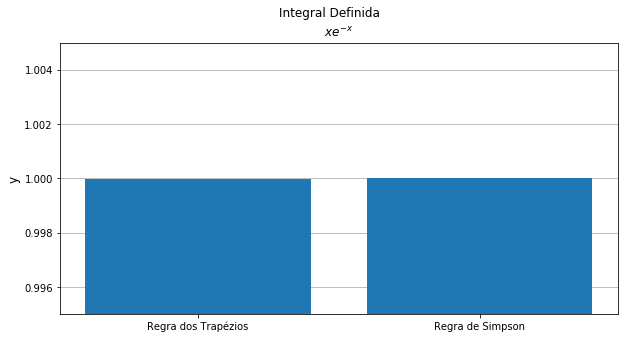

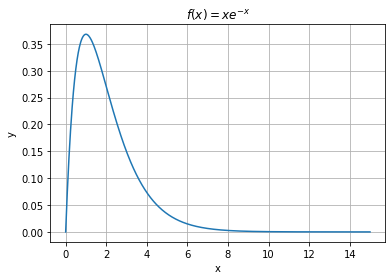

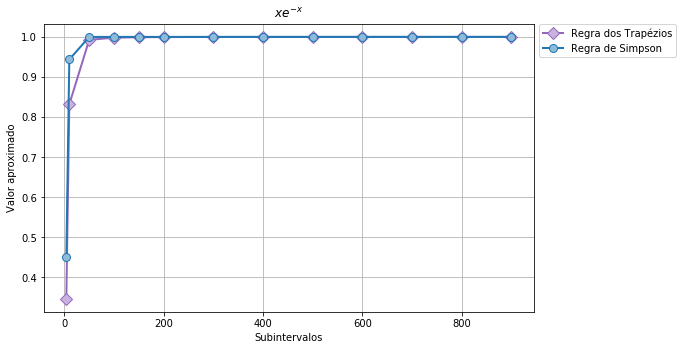

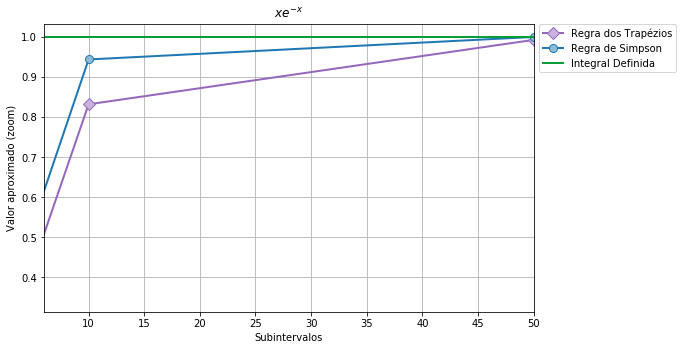

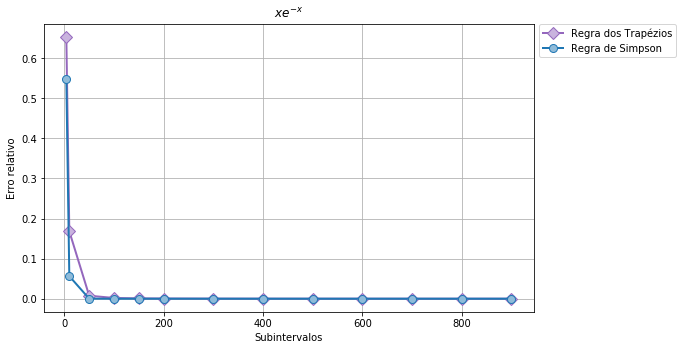

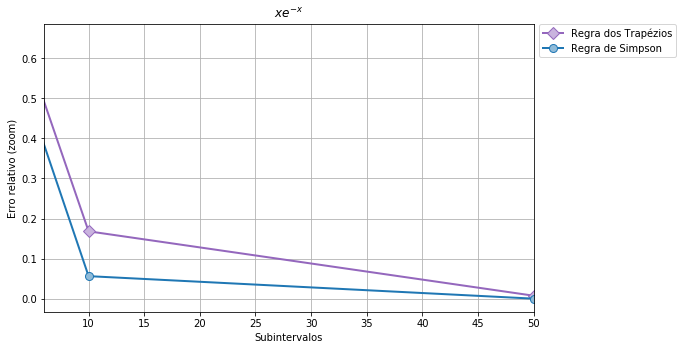

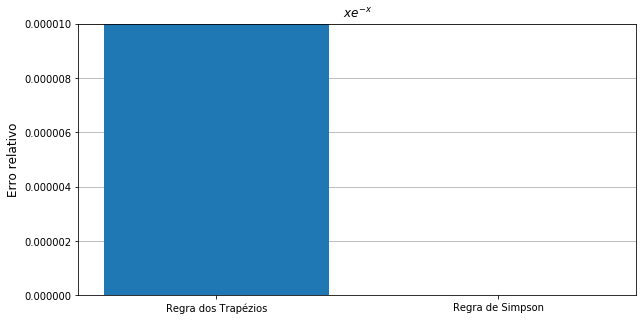

In [24]:
# Coloque aqui a definição da sua função main().
# A função main() deve ser responsável por chamar as outras função e gerar o gráfico que compara os métodos.
# Você pode usar a função main() abaixo como base para a sua, mas deixe-a com a sua "cara". Note que, nesse caso, você 
#   deve trocar os valores de y1 e y2 para que o gráfico gerado esteja de acordo com as soluções encontradas pelos métodos.

#Veja um exemplo. 
def main():
    #Subintervalos utilizados
    N = [4, 10, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900]
    x = N[:]
    numFunc = 3 #número relativo a função (1,2,3) fiz assim para ficar mais fácil de gerar os gráficos, só trocar aqui pelo número da função que quer, sendo ele apenas 1,2 ou 3, fora isso provavelmente vai dar erro
    f,a,b,nomeFuncao,intDefinida = escolhaFuncao(numFunc) # Chamando a primeira função
    integralTrapezio = (calculaIntegralMetodos(regraTrapezios,f,a,b,N))
    integralSimpson = (calculaIntegralMetodos(regraSimpson,f,a,b,N))

    y1 = integralTrapezio[:]
    y2 = integralSimpson[:]
    
    #Se quiser imprimir a tabela aqui, basta descomentar o código abaixo
    #printResultado(nomeFuncao,a,b,N,integralTrapezio,integralSimpson,intDefinida)
    
    plotGrafico(numFunc,N,y1,y2,nomeFuncao,intDefinida,f,a,b)

# Executa a função principal do projeto
main()